# Python for (open) Neuroscience

_Lecture 3.2_ - Introduction to Statistics and Machine learning in Pyhton

Luigi Petrucco

Jean-Charles Mariani

## Classical statistics using Python

Disclaimer: I know very little about statistics!

No, Python will not tell you what tests to use...

...but `scipy` module provides functions for pretty much any kind of classical statistics you might want to compute!

### Descriptive statistics

#### Mean, median, mode

In [55]:
import numpy as np
import scipy.stats as stats

data = np.random.normal(0, 1, 1000)

print('Mean: {}'.format(np.mean(data)))
print('Median: {}'.format(np.median(data)))

print('Mode: {}'.format(stats.mode(data)[0][0]))

Mean: 0.015192644850314414
Median: 0.018368476092006043
Mode: -3.2055934369069976


/var/folders/wp/q156lfy924zg6bqc48v9j2800000gn/T/ipykernel_44782/2923226503.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print('Mode: {}'.format(stats.mode(data)[0][0]))


#### Standard deviation, variance

In [56]:
print(f'Standard deviation: {np.std(data)}')
print(f'Variance: {np.var(data)}')

Standard deviation: 1.0029657293818528
Variance: 1.005940254314472


#### Percentiles

In [57]:
print(f' 95Perencile: {np.percentile(data, 95)}')

 95Perencile: 1.6139768342885055


## Statistical tests

In [12]:
import scipy.stats as stats

### One-sample tests

In [69]:
# One-sample t-test
data = np.random.normal(1, 1, 1000)

test_result = stats.ttest_1samp(data, 0)
test_result

TtestResult(statistic=30.929118150916977, pvalue=6.987299873140409e-148, df=999)

In [14]:
# One-sample Wilcoxon signed-rank test
stats.wilcoxon(data)

WilcoxonResult(statistic=248798.0, pvalue=0.8737165940269713)

# Two-sample t-test

In [15]:
data2 = np.random.normal(0, 1, 1000)

stats.ttest_ind(data, data2)

Ttest_indResult(statistic=-2.2167689456143123, pvalue=0.02675110177528722)

# Two-sample Wilcoxon rank-sum test

In [16]:
#Two-sample Wilcoxon rank-sum test
stats.ranksums(data, data2)

RanksumsResult(statistic=-2.0777234976131287, pvalue=0.03773483352982074)

#### Paired samples

# Paired t-test

In [17]:
stats.ttest_rel(data, data2)

TtestResult(statistic=-2.2192799992314933, pvalue=0.02669167013354875, df=999)

# Paired Wilcoxon signed-rank test

In [18]:
stats.wilcoxon(data, data2)

WilcoxonResult(statistic=229521.0, pvalue=0.023265500404451984)

# One-way ANOVA

In [19]:
data = np.random.normal(0, 1, 1000)
data2 = np.random.normal(0, 1, 1000)
data3 = np.random.normal(-1, 1, 1000)
stats.f_oneway(data, data2, data3)

F_onewayResult(statistic=376.52312949276285, pvalue=1.3219093996730449e-146)

# Kolmogorov-Smirnov test

In [62]:
data_norm = np.random.normal(0, 1, 1000)
data_unif = np.random.uniform(0, 1, 1000)

stats.kstest(data_norm, 'norm')

KstestResult(statistic=0.051761753589674775, pvalue=0.009077588534389655, statistic_location=-0.3245475787815602, statistic_sign=-1)

### Correlation

PearsonRResult(statistic=0.0023291659125051524, pvalue=0.941358374267056)

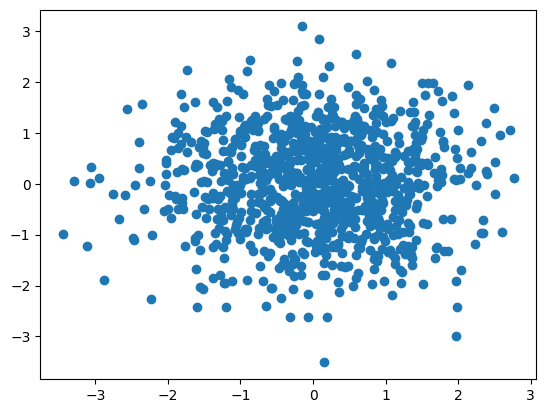

In [71]:
from matplotlib import pyplot as plt
data = np.random.normal(0, 1, 1000)
data2 = np.random.normal(0, 1, 1000)

plt.scatter(data, data2)
stats.pearsonr(data, data2)

PearsonRResult(statistic=0.7273542704293603, pvalue=2.276213597443335e-165)

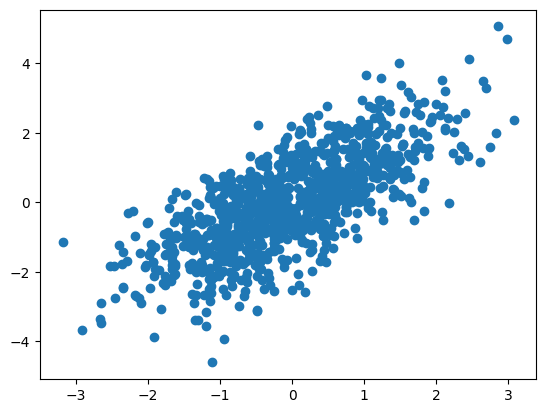

In [72]:
data = np.random.normal(0, 1, 1000)
data2 = data + np.random.normal(0, 1, 1000)

plt.scatter(data, data2)
stats.pearsonr(data, data2)

## Normality tests

In [23]:
# Test normality of data
data = np.random.normal(0, 1, 1000)
stats.normaltest(data)

NormaltestResult(statistic=1.0181328346459215, pvalue=0.6010564528526907)

# Curve fitting

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the function to fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [74]:
# Generate data
x = np.linspace(0, 4, 50)

ydata = func(x, 2.5, 1.3, 0.5) + 0.2 * np.random.normal(size=len(x))

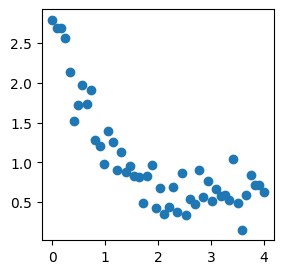

In [75]:
# plot the data
plt.figure(figsize=(3, 3))
plt.scatter(x, ydata, label='data')

In [76]:
# Fit the data
popt, pcov = curve_fit(func, x, ydata)


In [77]:
popt

array([2.44527699, 1.30428349, 0.53935633])

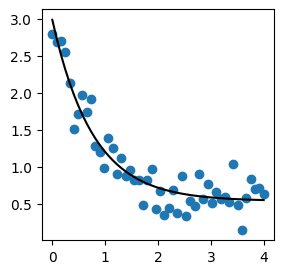

In [80]:
plt.figure(figsize=(3, 3))
plt.scatter(x, ydata, label='data')
#plt.plot(x, func(x, popt[0], popt[1], popt[2]), c="k", label='fit')
# Entirely equivalent to:
plt.plot(x, func(x, *popt), c="k", label='fit')

In [81]:
pcov

array([[ 0.01619199,  0.00682537, -0.00086669],
       [ 0.00682537,  0.0216964 ,  0.00604325],
       [-0.00086669,  0.00604325,  0.00314788]])

(Practicals 3.2.0)

# Visualizing data using seaborn

In [82]:
import seaborn as sns

iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


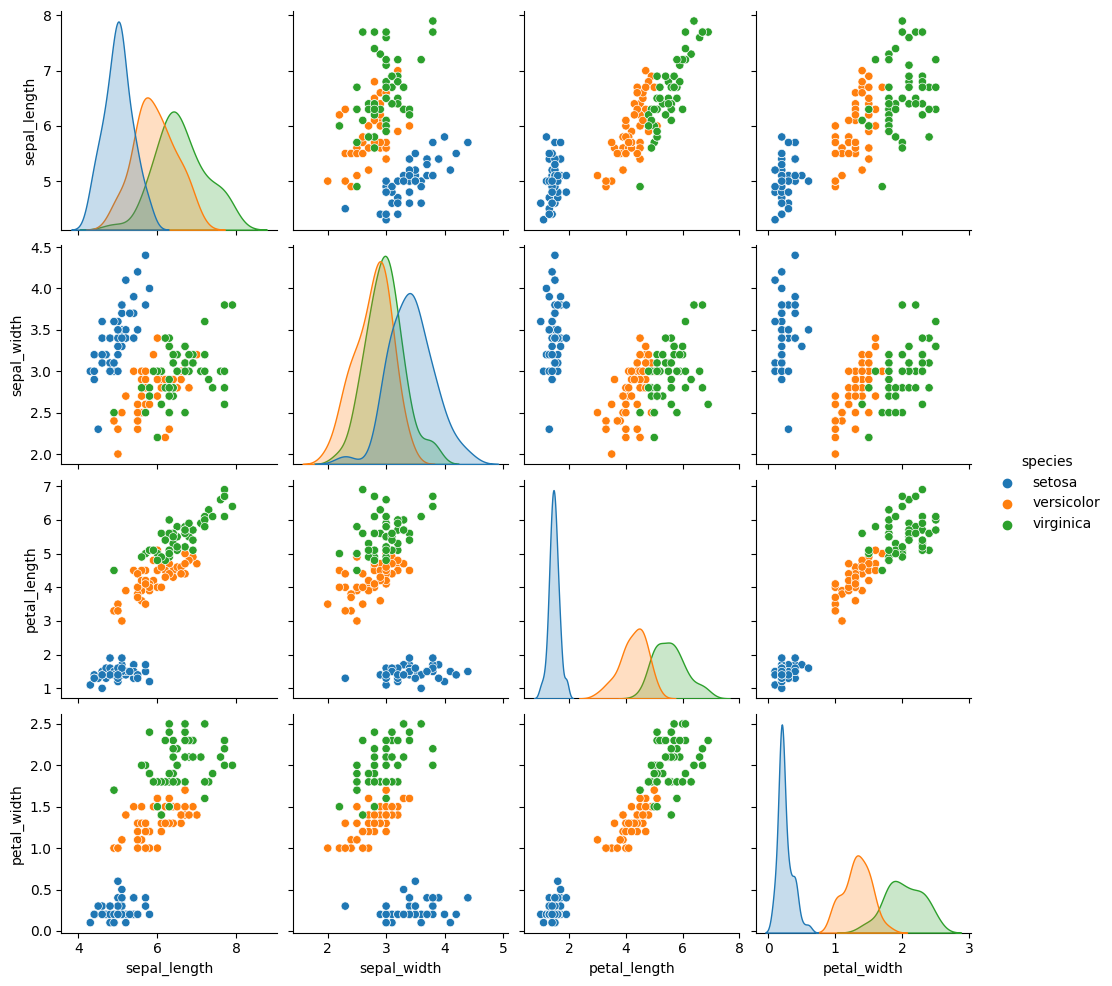

In [85]:
sns.pairplot(iris, hue='species')

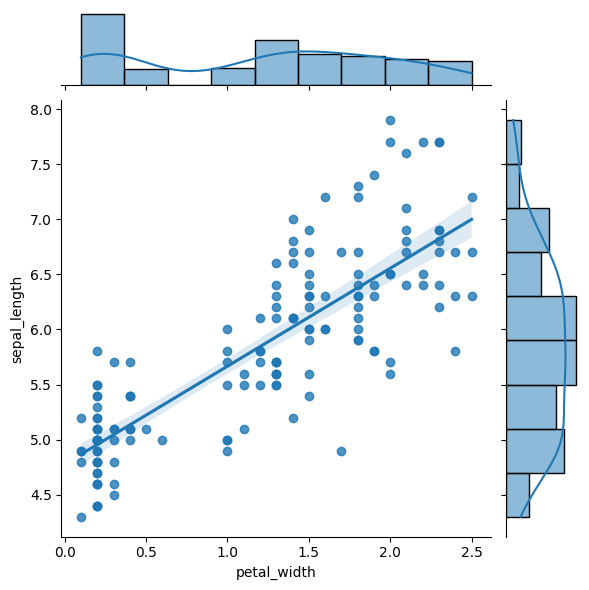

In [86]:
sns.jointplot(x="petal_width", y="sepal_length", data=iris, kind='reg')

## Advanced statistics using statsmodels

The `statsmodels` module provides a more complete set of statistical tools, including:
- Linear models
- Generalized linear models
- Multivariate statistics
- ...

### Linear models

In [87]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = sm.datasets.get_rdataset('Guerry', 'HistData').data
data = data[['Lottery', 'Literacy', 'Wealth', 'Region']].dropna()
data.head()

,Lottery,Literacy,Wealth,Region
0,41,37,73,E
1,38,51,22,N
2,66,13,61,C
3,80,46,76,E
4,79,69,83,E


In [90]:
model = smf.ols('Lottery ~ Literacy + Wealth + Region', data=data)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           1.07e-05
Time:                        18:21:55   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

# Machine learning using scikit-learn

## Data preprocessing

In [95]:
from sklearn import preprocessing
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [94]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

Other scalers for max-min normalization ( MinMaxScaler), etc.

In [97]:
# Histogram equalization
data = np.random.normal(0, 1, 1000)
quantile_trasformer = preprocessing.QuantileTransformer(n_quantiles=1000)
trasf = quantile_trasformer.fit_transform(data.reshape(-1, 1))

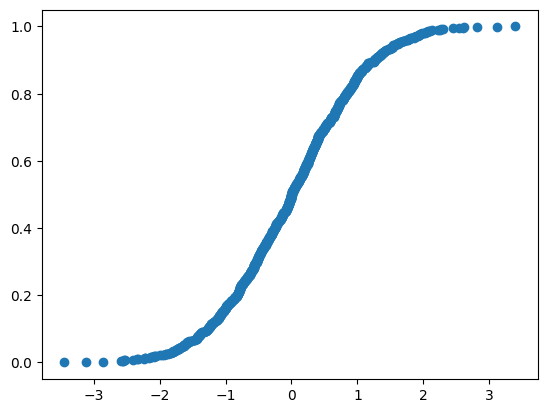

In [98]:
plt.figure()
plt.scatter(data, trasf)

# Dimensionality reduction

### Principal component analysis

In [100]:
X

array([[-1, -1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2]])

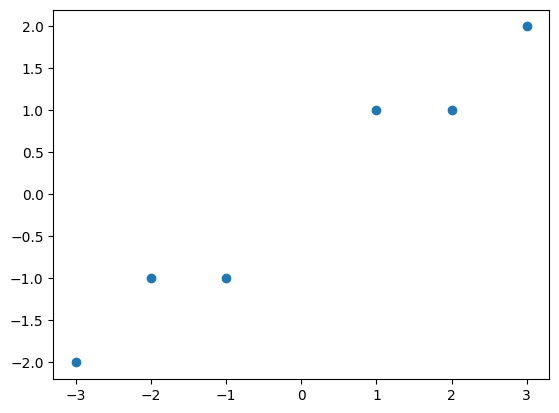

In [99]:
from sklearn.decomposition import PCA

# A simple tw-dimension dataset:
from sklearn import datasets

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

plt.figure()
plt.scatter(X[:, 0], X[:, 1])

In [101]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)

#print(pca.singular_values_)

[0.99244289 0.00755711]


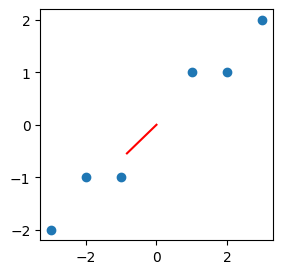

In [102]:
plt.figure(figsize=(3, 3)  )
plt.scatter(X[:, 0], X[:, 1])
plt.plot([0, pca.components_[0, 0]], [0, pca.components_[0, 1]], 'r')

(-3.965834174898736,
 3.965834174898736,
 -0.3229365667890348,
 0.3229365667890348)

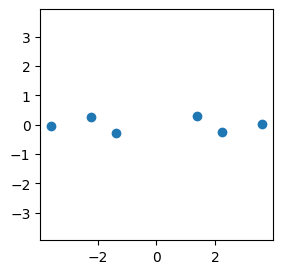

In [105]:
transformed = pca.transform(X)

plt.figure(figsize=(3, 3))
plt.scatter(transformed[:, 0], transformed[:, 1])
plt.axis("equal")

# Splitting data into training and test sets

## Scikit-learn offers a function to split data into training and test sets:

In [106]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=50000, centers=5, n_features=5, random_state=0)

In [110]:
y.shape

(50000,)

In [109]:
X.shape

(50000, 5)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, random_state=50)

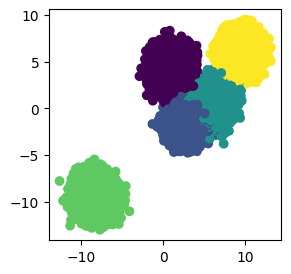

In [111]:
plt.figure(figsize=(3, 3))
plt.scatter(X[:, 0], X[:, 1], c=y)

There's also tools to loop over multiple splits of the data:



In [112]:
from sklearn.model_selection import KFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],
              [0, 2], [1, 2], [5, 2], [0, 1]])

kf = KFold(n_splits=4)
kf.get_n_splits(X)
# print(kf)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [2 3 4 5 6 7] TEST: [0 1]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
TRAIN: [0 1 2 3 6 7] TEST: [4 5]
TRAIN: [0 1 2 3 4 5] TEST: [6 7]


# Data clustering

In [113]:
import numpy as np

# Create two clusters of data and merge them into one dataset:
X, y = make_blobs(n_samples=50000, centers=4, cluster_std=2,
                  n_features=2, random_state=10)


In [115]:
X

array([[ -5.94061568,   6.32935727],
       [ -4.77276244,  -2.99645567],
       [ -6.05417811,   4.07651473],
       ...,
       [  2.2346159 ,   6.18616008],
       [  1.62239343,   4.01365916],
       [  3.21455226, -10.72734077]])

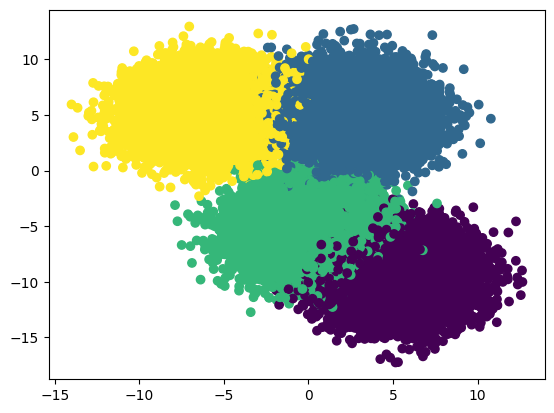

In [114]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)

In [116]:
from sklearn.cluster import KMeans


# Split data in test and train:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=50)

kmeans = KMeans(init="k-means++", n_clusters=4, n_init=10)
kmeans.fit(X_train)

Y_predicted = kmeans.predict(X_test)

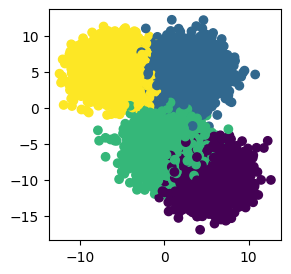

In [117]:
plt.figure(figsize=(3, 3))

plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test)

# Measuring accuracy

In [118]:
from sklearn.metrics import confusion_matrix

In [120]:
conf_matrix = confusion_matrix(Y_test, Y_predicted)

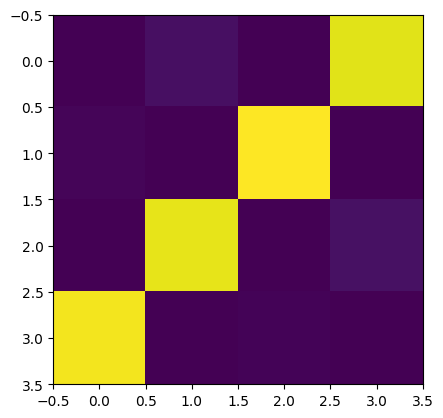

In [121]:
plt.figure()
plt.imshow(conf_matrix)

(Practicals 3.2.1)